# Проект: Анализ бизнес-показателей

**Описание проекта:**
Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
 - лог сервера с данными об их посещениях,
 - выгрузка их покупок за этот период,
 - рекламные расходы.
 
**Цель исследования**:
 - изучить откуда приходят пользователи и какими устройствами они пользуются,
 - изучитьсколько стоит привлечение пользователей из различных рекламных каналов;
 - изучить сколько денег приносит каждый клиент,
 - определить когда расходы на привлечение клиента окупаются,
 - определить какие факторы мешают привлечению клиентов.

**План исследования**

Данные находятся в файлах `/datasets/visits_info_short.csv`, `/datasets/orders_info_short.csv`,`/datasets/costs_info_short.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки найти возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии
 4. Исследовательский анализ данных.
 5. Маркетинг.
 6. Оценка окупаемости рекламы.
 7. Общий вывод.

**Описание данных**
В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
 - `User Id` — уникальный идентификатор пользователя,
 - `Region` — страна пользователя,
 - `Device` — тип устройства пользователя,
 - `Channel` — идентификатор источника перехода,
 - `Session Start` — дата и время начала сессии,
 - `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
 - `User Id` — уникальный идентификатор пользователя,
 - `Event Dt` — дата и время покупки,
 - `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
 - `dt` — дата проведения рекламной кампании,
 - `Channel` — идентификатор рекламного источника,
 - `costs` — расходы на эту кампанию.

Необходимо загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Необходимо обратить внимание на столбцы с датой и временем.

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#отображение всех чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# чтение датасета, применение условия для открытия файлов из локального расположения или из среды Я.Практикума
# сохранение датасетов в переменные visits, orders, costs
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

**Изучение датафрейма visits:**

In [3]:
# вывод первых 10 строк датафрейма visits
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
# вывод последних 10 строк датафрейм
visits.tail(10) 

,User Id,Region,Device,Channel,Session Start,Session End
309891,136940622331,France,Android,AdNonSense,2019-10-31 17:12:29,2019-10-31 17:15:11
309892,69556000475,UK,iPhone,AdNonSense,2019-10-31 01:26:31,2019-10-31 01:39:21
309893,805154517300,France,iPhone,LeapBob,2019-10-31 07:07:13,2019-10-31 07:38:52
309894,207948856745,France,PC,WahooNetBanner,2019-10-31 11:38:01,2019-10-31 11:50:29
309895,95774241409,UK,PC,OppleCreativeMedia,2019-10-31 11:14:15,2019-10-31 11:50:29
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


In [5]:
# вывод основной информации о датафрейме с помощью метода info()
visits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# вывод количества пропущенных значений для каждого столбца. 
visits.isna().sum().sort_values() 

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [7]:
# просмотр наличия явных дубликатов
visits.duplicated().sum() 

0

In [8]:
#просмотр уникальных значений в столбцах датафрейма visits
visits['Region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

In [9]:
visits['Device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

In [10]:
visits['Channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

**Изучение датафрейма orders:**

In [11]:
# вывод первых 10 строк датафрейма
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [12]:
# вывод последних 10 строк датафрейм
orders.tail(10) 

,User Id,Event Dt,Revenue
40202,981966082461,2019-10-31 15:19:00,4.99
40203,43843333146,2019-10-31 21:45:38,4.99
40204,436309219475,2019-10-31 18:49:29,4.99
40205,662522538439,2019-10-31 09:38:22,4.99
40206,580962171213,2019-10-31 03:23:40,4.99
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


In [13]:
# вывод основной информации о датафрейме с помощью метода info()
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
# вывод количества пропущенных значений для каждого столбца. 
orders.isna().sum().sort_values() 

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [15]:
# просмотр наличия явных дубликатов
orders.duplicated().sum() 

0

In [16]:
# просмотр описательной статистики каждого столбца в orders
orders.describe(include='all')

,User Id,Event Dt,Revenue
count,40212.00,40212,40212.00
unique,NaN,40163,NaN
top,NaN,2019-10-02 00:31:33,NaN
freq,NaN,2,NaN
mean,499029531203.23,NaN,5.37
std,286093675967.17,NaN,3.45
min,599326.00,NaN,4.99
25%,251132440436.75,NaN,4.99
50%,498283972665.00,NaN,4.99
75%,743332711780.00,NaN,4.99


**Изучение датафрейма costs:**

In [17]:
# вывод первых 10 строк датафрейма
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
5,2019-05-06,FaceBoom,118.80
6,2019-05-07,FaceBoom,101.20
7,2019-05-08,FaceBoom,100.10
8,2019-05-09,FaceBoom,93.50
9,2019-05-10,FaceBoom,104.50


In [18]:
# вывод последних 10 строк датафрейм
costs.tail(10) 

,dt,Channel,costs
1790,2019-10-18,lambdaMediaAds,8.00
1791,2019-10-19,lambdaMediaAds,5.60
1792,2019-10-20,lambdaMediaAds,8.80
1793,2019-10-21,lambdaMediaAds,7.20
1794,2019-10-22,lambdaMediaAds,6.40
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80
1799,2019-10-27,lambdaMediaAds,12.00


In [19]:
# вывод основной информации о датафрейме с помощью метода info()
costs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [20]:
# вывод количества пропущенных значений для каждого столбца. 
costs.isna().sum().sort_values() 

dt         0
Channel    0
costs      0
dtype: int64

In [21]:
# вывод на уникальных значений в столбце 'Channel' датафрейма costs
costs['Channel'].value_counts()

AdNonSense            180
LeapBob               180
lambdaMediaAds        180
OppleCreativeMedia    180
TipTop                180
FaceBoom              180
YRabbit               180
WahooNetBanner        180
MediaTornado          180
RocketSuperAds        180
Name: Channel, dtype: int64

In [22]:
# вывод описательной статистики каждого столбца в costs
costs.describe(include='all')

,dt,Channel,costs
count,1800,1800,1800.00
unique,180,10,NaN
top,2019-06-20,AdNonSense,NaN
freq,10,180,NaN
mean,NaN,NaN,58.61
std,NaN,NaN,107.74
min,NaN,NaN,0.80
25%,NaN,NaN,6.50
50%,NaN,NaN,12.29
75%,NaN,NaN,33.60


In [23]:
# проверка датафреймов на явные дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


**В результате обзора выявлено**:
  - во всех трёх датафреймах нет пропусков и дубликатов;
  - в датафрейме 'visits' 6 столбцов, 309901 строка, наибольшим спросом приложение Procrastinate Pro+ пользуется в United States - 207327, наибольшее количество переходов на приложение происходит с устройства пользователя iPhone - 112603, источником перехода в большинстве случаев является 'organic' - 107760, то есть пользователи переходят в приложение из поиска;
  - датафрейм 'orders' содержит 3 столбца, 40212 строк. Столбец 'Revenue' датафрейма 'orders' необходимо проверить на выбросы, так как среднее значение - 5.37, минимальное значение - 4.99, максимальное - 49.99;
  - датафрейм 'costs' содержит 3 столбца, 1800 строк. Столбец 'costs' датафрейма 'costs' необходимо проверить на выбросы, так как среднее значение - 58.60, минимальное - 0.80, максимальное - 630.00;
  - необходимо привести к змеиному регистру наименования столбцов всех трёх датафреймов;
  - необходимо привести к нижнему регистру значения столбца 'Channel' в датафреймах 'visits' и 'costs';
  - необходимо изменить тип данных для дат во всех датафреймах, так как он сейчас в формате object.

### Предобработка данных

In [24]:
# замена названий столбцов и приведение к нижнему регистру:
visits.columns = visits.columns.str.lower()
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = orders.columns.str.lower()
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = costs.columns.str.lower()

# приведение всех значений столбца 'channel'к нижнему регистру
visits['channel'] = visits['channel'].astype(str).str.lower()
costs['channel'] = costs['channel'].astype(str).str.lower()

# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# проверка результата
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [25]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [26]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [27]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [28]:
costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.30
1,2019-05-02,faceboom,78.10
2,2019-05-03,faceboom,85.80
3,2019-05-04,faceboom,136.40
4,2019-05-05,faceboom,122.10


In [29]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

**Вывод:** после предобработки, данные находятся в подходящих для проведения расчётов форматах, столбцы поименованы согласно правил змеиного регистра.

### Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Введём функции, созданные ранее.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания пользовательских профилей - get_profiles()**

In [30]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для расчета удержания - get_retention()**

In [31]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета конверсии - get_conversion()**

In [32]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

 **Функция для расчета LTV и ROI - get_ltv()**

In [33]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция для сглаживания данных - filter_data()**

In [34]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция для визуализации удержания - plot_retention()**

In [35]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для визуализации конверсии - plot_conversion()**

In [36]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI - plot_ltv_roi()**

In [37]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Профили пользователей**

Составление профилей пользователей. 

In [38]:
# составление профили пользователей по трем наборам данных
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,faceboom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,adnonsense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,yrabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Определите минимальную и максимальную даты привлечения пользователей.

In [39]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Минимальная и максимальная даты соответствуют техническому заданию.

**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицы, отражающей количество пользователей и долю платящих из каждой страны.**

In [40]:
# определение из каких стран приходят пользователи
print(profiles.region.unique())

['United States' 'France' 'Germany' 'UK']


In [41]:
# определение стран, которые дают наибольшее количество платящих пользователей
region_users = (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)
region_users.set_axis(['region', 'total_users', 'payers'], axis='columns', inplace=True)

# опредение доли платящих пользователей из каждой страны
region_users['payer_ratio, %'] = round(region_users.payers / region_users.total_users * 100, 2)
region_users.sort_values(by='payer_ratio, %', ascending=False)

,region,total_users,payers,"payer_ratio, %"
3,United States,100002,6902,6.90
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
0,France,17450,663,3.80


Приложение рекламируется в четырёх странах United States, Germany, UK, France. Наибольшее количество - 100002 - пользователей приложения приходит из США. Доля платящих из США составляет - 6.90%. 

Далее следуют:
 - Великобритания - 17575 пользоватей и 3.98% платящих пользователей;
 - Франция - 17450 пользователей и 3.80% платящих пользователей;
 - Германия - 14981 пользователей и 4.11% платящих пользователей.

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

In [42]:
# определение устройств с которых заходят пользователи
print(profiles.device.unique())

['Mac' 'iPhone' 'PC' 'Android']


In [43]:
# определение количества пользователей для каждого устройства
device_users = (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), on = 'device', how = 'left')
)
device_users.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)

# опредение доли платящих пользователей для каждого устройства
device_users['payer_ratio, %'] = round(device_users.payers / device_users.total_users* 100, 2)
device_users.sort_values(by='payer_ratio, %', ascending=False) 

,device,total_users,payers,"payer_ratio, %"
1,Mac,30042,1912,6.36
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
2,PC,30455,1537,5.05


Наибольшее число пользователей заходят в приложение с iPhone - 54479. Среди платящих наибольшая доля пользователей заходит с устройств Mac и iPhone. Следует отметить, что по количеству пользователей Mac представлен меньше всего, но доля платящих среди них наибольшая. 

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [44]:
# определение источников привлечения пользователей
print(profiles.channel.unique())

['faceboom' 'organic' 'adnonsense' 'yrabbit' 'mediatornado'
 'rocketsuperads' 'leapbob' 'tiptop' 'wahoonetbanner' 'opplecreativemedia'
 'lambdamediaads']


In [45]:
# определим каналы приносящие наибольшую долю платящих пользователей?
channel_users = (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), on = 'channel', how = 'left')
)
channel_users.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)

channel_users['payer_rate, %'] = round(channel_users.payers / channel_users.total_users * 100, 2)
channel_users.sort_values(by='payer_rate, %', ascending=False)

,channel,total_users,payers,"payer_rate, %"
1,faceboom,29144,3557,12.20
0,adnonsense,3880,440,11.34
2,lambdamediaads,2149,225,10.47
8,tiptop,19561,1878,9.60
7,rocketsuperads,4448,352,7.91
9,wahoonetbanner,8553,453,5.30
10,yrabbit,4312,165,3.83
4,mediatornado,4364,156,3.57
3,leapbob,8553,262,3.06
5,opplecreativemedia,8605,233,2.71


Наибольшее количество пользователей пришло с канала organic - 56439, faceboom - 29144 и tiptop - 19561. Наибольшая доля платящих пользователей пришла из faceboom - 12.20%, на втором месте adnonsense	- 11.34%, на третьем месте lambdamediaads - 10.47%. "Органические" пользователи показывают самую низкую конверсию из всех каналов привлечения - 2.06%. Это следствие того что при покупке рекламы каналы оптимизируют для привлечения наиболее "платящей" аудитории.

**Вывод:**

 - составлены профилей пользователей;
 - определены минимальная (2019-05-01) и максимальная (2019-10-31) даты привлечения пользователей;
 - наибольшее количество - 100002 пользователей приложения приходит из США. Наибольшая доля платящих пользователей приходится на  США и составляет - 6.90%;
 - наибольшее число пользователей заходят в приложение с iPhone - 54479. Большинство платящих пользователей заходят с устройств Mac (6.36%) и iPhone (6.21%);
 - наибольшая доля платящих пользователей приходит из faceboom - 12.20%, на втором месте adnonsense	- 11.34%, на третьем месте lambdamediaads - 10.47%. "Органические" пользователи показывают самую низкую конверсию из всех каналов привлечения - 2.06%.

### Маркетинг

- Посчитайем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишем промежуточные выводы.

In [46]:
#исключим пользователей с "органическим" трафиком, так как мы исследум платный трафик
profiles = profiles.query('channel != "organic"')

**Расчёт общей суммы расходов на маркетинг**

In [47]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


**Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник**

In [48]:
# вывщд таблицы суммы расходов с разбивкой по рекламным источникам
costs_channel = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'sum'})
    .rename(columns={'acquisition_cost':'sum_cost'})
    .sort_values(by='sum_cost', ascending=False)
    .reset_index()
)

#добавим в таблицу столбец с распределениеи суммы расходов по долям
costs_channel['cost_ratio, %'] = round(costs_channel['sum_cost'] / costs['costs'].sum() * 100, 2)
costs_channel = costs_channel.sort_values(by='cost_ratio, %', ascending=False)
costs_channel

,channel,sum_cost,"cost_ratio, %"
0,tiptop,54751.30,51.90
1,faceboom,32445.60,30.75
2,wahoonetbanner,5151.00,4.88
3,adnonsense,3911.25,3.71
4,opplecreativemedia,2151.25,2.04
5,rocketsuperads,1833.00,1.74
6,leapbob,1797.60,1.70
7,lambdamediaads,1557.60,1.48
8,mediatornado,954.48,0.90
9,yrabbit,944.22,0.90


Наибольшая сумма затрат на рекламу от источника tiptop - 51.90% рекламного бюджета и составляет 54751.30, следующий по расходам канал faceboom	- 30.75% и 32445.60. Наименьшая сумма затрат от источника yrabbit - 0.90% и 944.22.

**Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике**

Для построения визуализации динамики изменений расходов асходов во времени (по неделям и месяцам) необходмо добавить в таблицу 'costs' столбцы с неделей и месяцем.

In [49]:
# для бавим столбец с номером недели
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

# добавим столбец с номером месяца
costs['month'] = pd.to_datetime(costs['dt']).dt.month

costs.head()

,dt,channel,costs,week,month
0,2019-05-01,faceboom,113.30,18,5
1,2019-05-02,faceboom,78.10,18,5
2,2019-05-03,faceboom,85.80,18,5
3,2019-05-04,faceboom,136.40,18,5
4,2019-05-05,faceboom,122.10,18,5


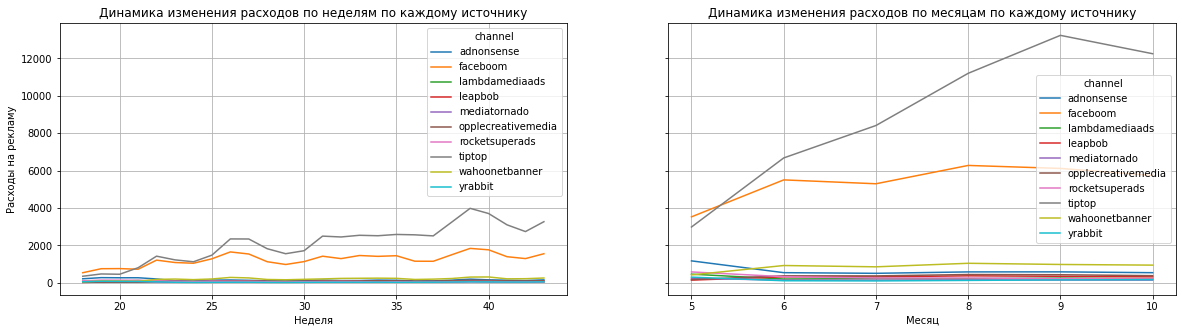

In [50]:
# задаём размер сетки для графиков
plt.figure(figsize=(20, 5))

# первый график — динамика расходов по неделям
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по неделям по каждому источнику');

# второй график — динамика расходов по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по месяцам по каждому источнику');
# plt.show()

На графике по неделям видно что самой затратной оказалась 39 неделя для источников tiptop и faceboom. На графике по месяцам видно повышение расходов на рекламу приложения на канале tiptop с мая по сентябрь, в октябре расход снижаются. 

На графике по меясцам выделяется канал faceboom, но затраты на этот ниже в сравнении с tiptop.

**Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника**

In [51]:
print('Средний CAC на одного пользователя для всей рекламной кампании:', 
      round(profiles['acquisition_cost'].mean(), 2))

Средний CAC на одного пользователя для всей рекламной кампании: 1.13


In [52]:
# расчёт среденего САС из каждого источника
cac_channel = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .rename(columns={'acquisition_cost':'mean_cac'})
    .sort_values(by='mean_cac', ascending=False)
    .reset_index()
)

cac_channel

,channel,mean_cac
0,tiptop,2.80
1,faceboom,1.11
2,adnonsense,1.01
3,lambdamediaads,0.72
4,wahoonetbanner,0.60
5,rocketsuperads,0.41
6,opplecreativemedia,0.25
7,yrabbit,0.22
8,mediatornado,0.22
9,leapbob,0.21


Расчитан средний САС на одного пользователя всей рекламной кампании: 1.13.

Расчитаны средение САС из каждого источника, другими словами сумма денег, в которую компании обходится каждый новый клиент. Самые "дорогие" клиенты приходят из источников tiptop - 2.80, faceboom - 1.11, adnonsense - 1.01.

Самые "бюджетные" из источников leapbob - 0.21, mediatornado - 0.22, yrabbit - 0.22. 

**Вывод:**

 - общая сумма расходов на маркетинг - 105497;
 - наибольшая сумма затрат на рекламу от источника tiptop - 51.90% рекламного бюджета и составляет 54751.30, следующий по расходам канал faceboom	- 30.75% и 32445.60. Наименьшая сумма затрат от источника yrabbit - 0.90% и 944.22;
 - происходило повышение расходов на рекламу приложения на канале tiptop с мая по сентябрь, в октябре расход снижаются. 

 - расчитаны средение САС из каждого источника. Самые "дорогие" клиенты приходят из источников tiptop - 2.80, самые "бюджетные" из источников leapbob - 0.21

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определим ниже.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI**

Для дальнейших расчётов необходимо установить момент и горизонт анализа данных. В таблицах приведены данные с 1-го мая по 27 октября 2019.

In [53]:
# момент анализа и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

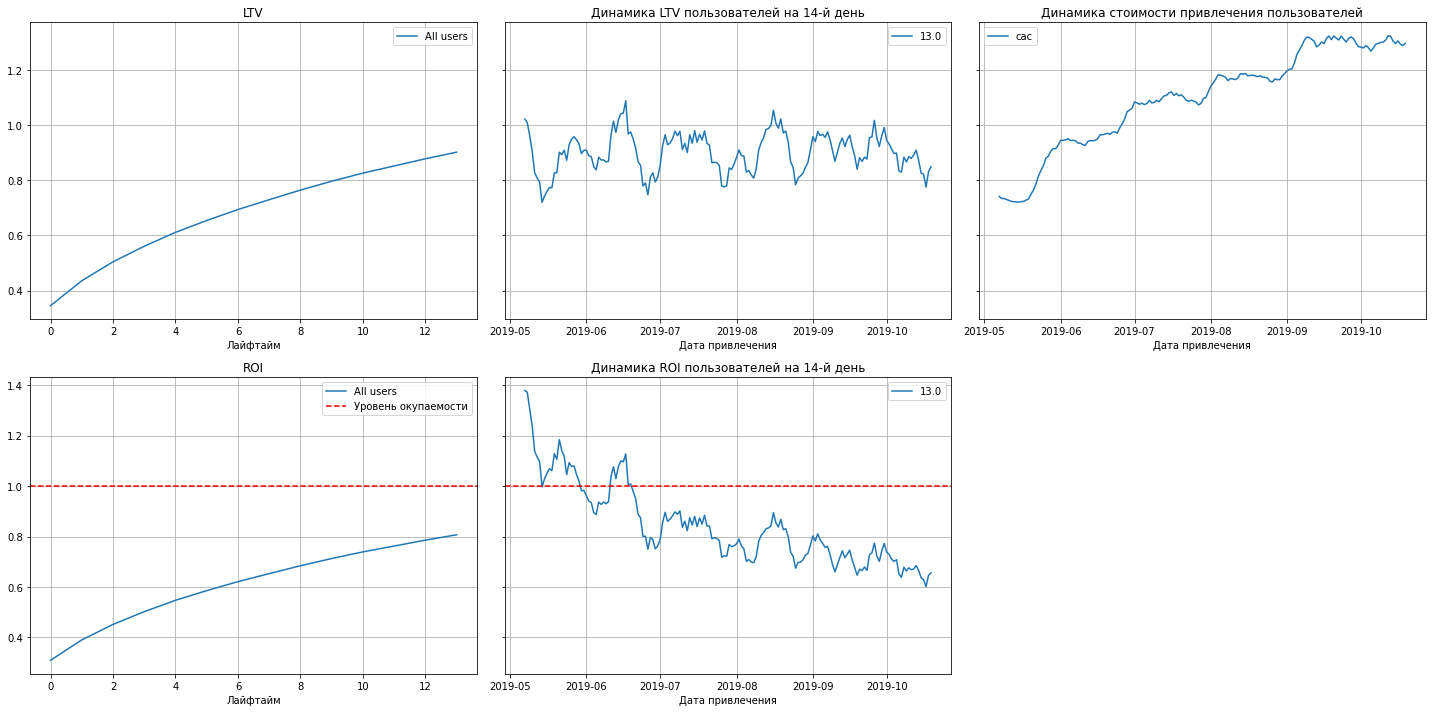

In [54]:
# расчёт LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:
 - значение LTV меньше значения CAC, это значит реклама неокупается, так как значение LTV должно превышать CAC.
 - показанель САС постоянно растёт, рентабельность рекламы снижается. Возможно проблема в избыточном увеличении бюджета;
 - LTV стабильно растёт;
 - ROI в конце горизонта анализа не достигает уровня окупаемости.

Чтобы понять, почему так происходит, изучим все характеристики пользователей.

**Анализ конверсии пользователей и динамики её изменения**

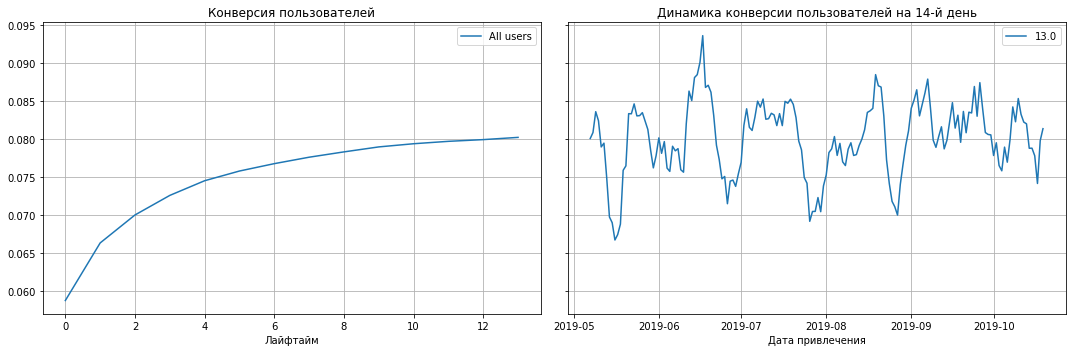

In [55]:
# посмотрим конверсию без разбивки по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- конверсия с 10 дня вышла на "плато" и более не увеличивалась;
- динамика конверсии сильно скачет. Конверсия судя по графику на конец периода составляет около 8%.

**Анализ удержания пользователей и динамика его изменения**

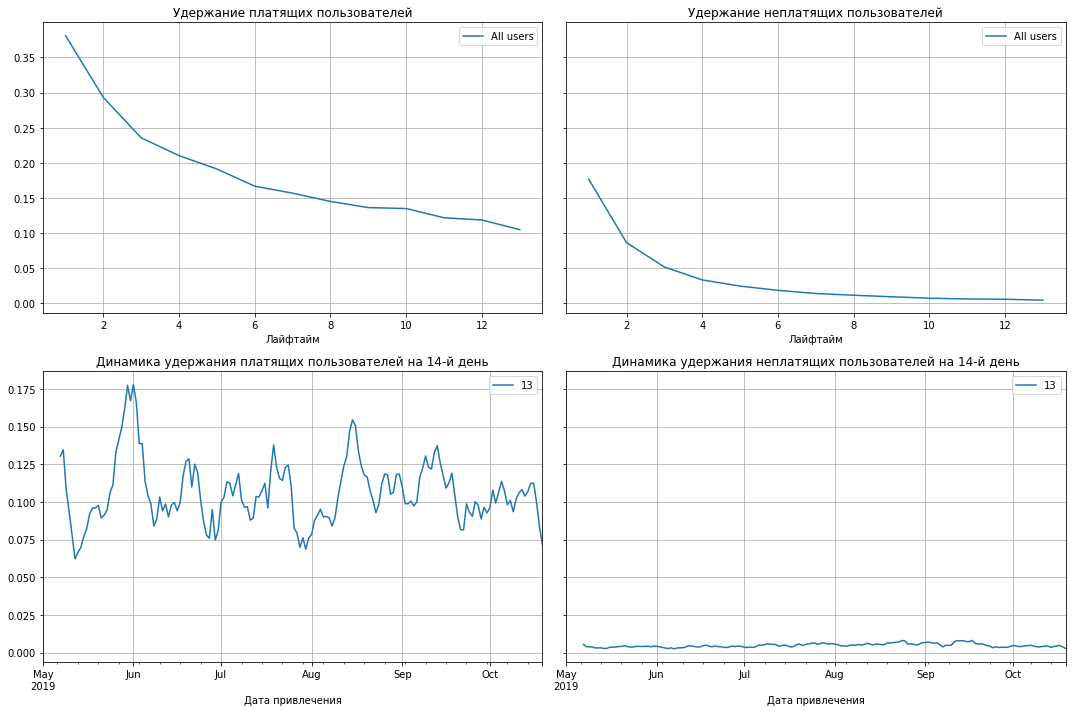

In [56]:
# посмотрим удержание без разбивки по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

 - к концу периода лишь около 10% платящих пользователей продолжают пользоваться приложением Procrastinate Pro+.

**Анализ окупаемости рекламы с разбивкой по устройствам**

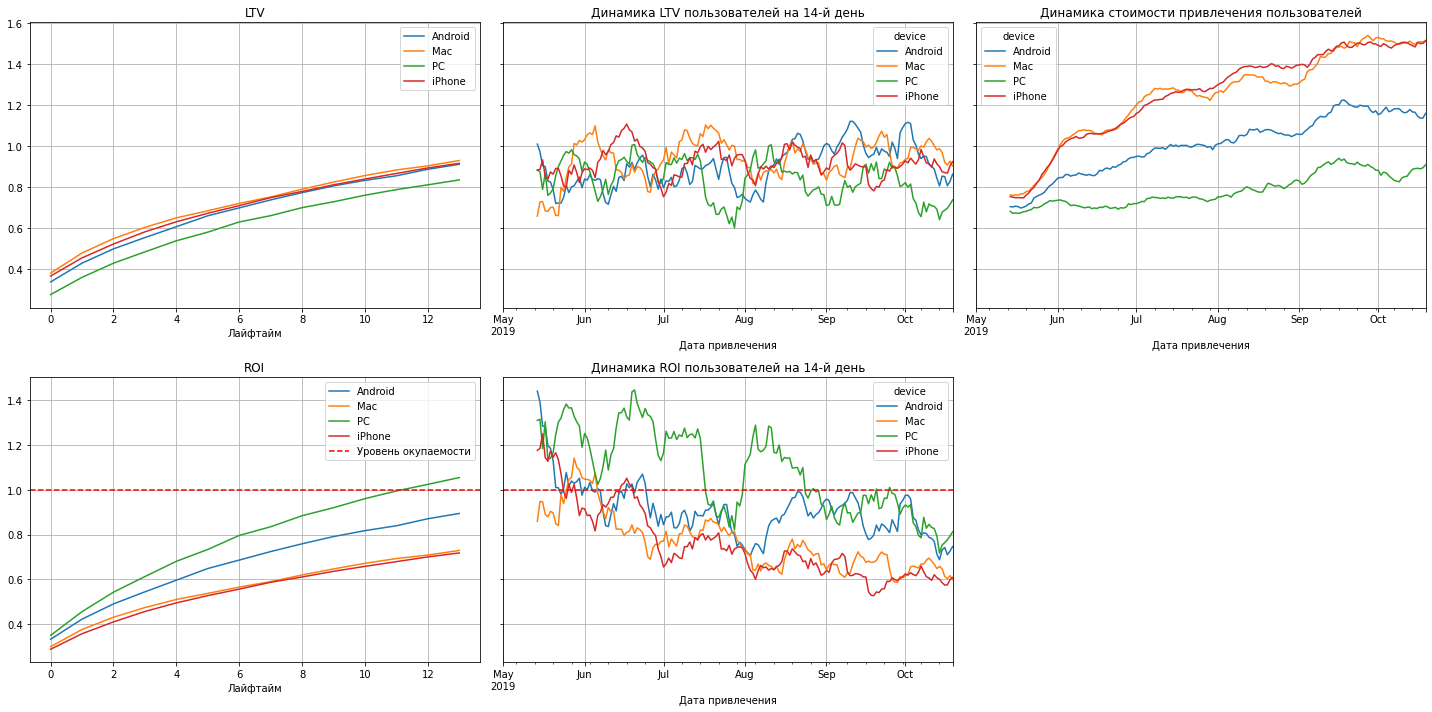

In [57]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам видно:
- LTV пользователей стабильно независимо от устройства. Однако пользователи, использующие PC приносят меньше всего выручки;
- стоимость привлечения пользователей растёт на Mac и iPhone;
- в соответствии с ROI, пользователи PC окупаются. ROI платформ Mac, iPhone и Android не достигает уровня окупаемости в конце горизонта анализа;
- динамика ROI всех пользователей имеет тенденцию на снижение. ROI выше всего у пользователей с PC.

Возможно, лучшая окупаемость рекламы среди пользователей PC связана с лучшей оптимизацией приложения для PC по сравнению с другими платформами.

**Дополнительно проведём анализ удержания с разбивкой по устройствам**

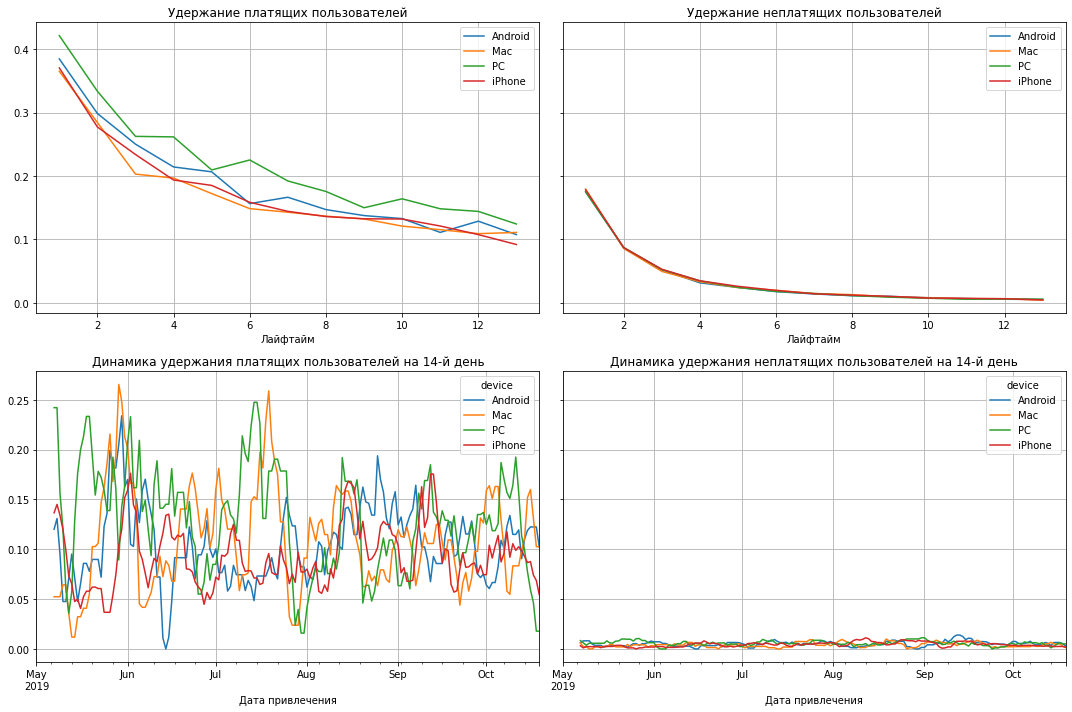

In [58]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

 В целом удержание по всем устройствам одинаковое.

**Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.**

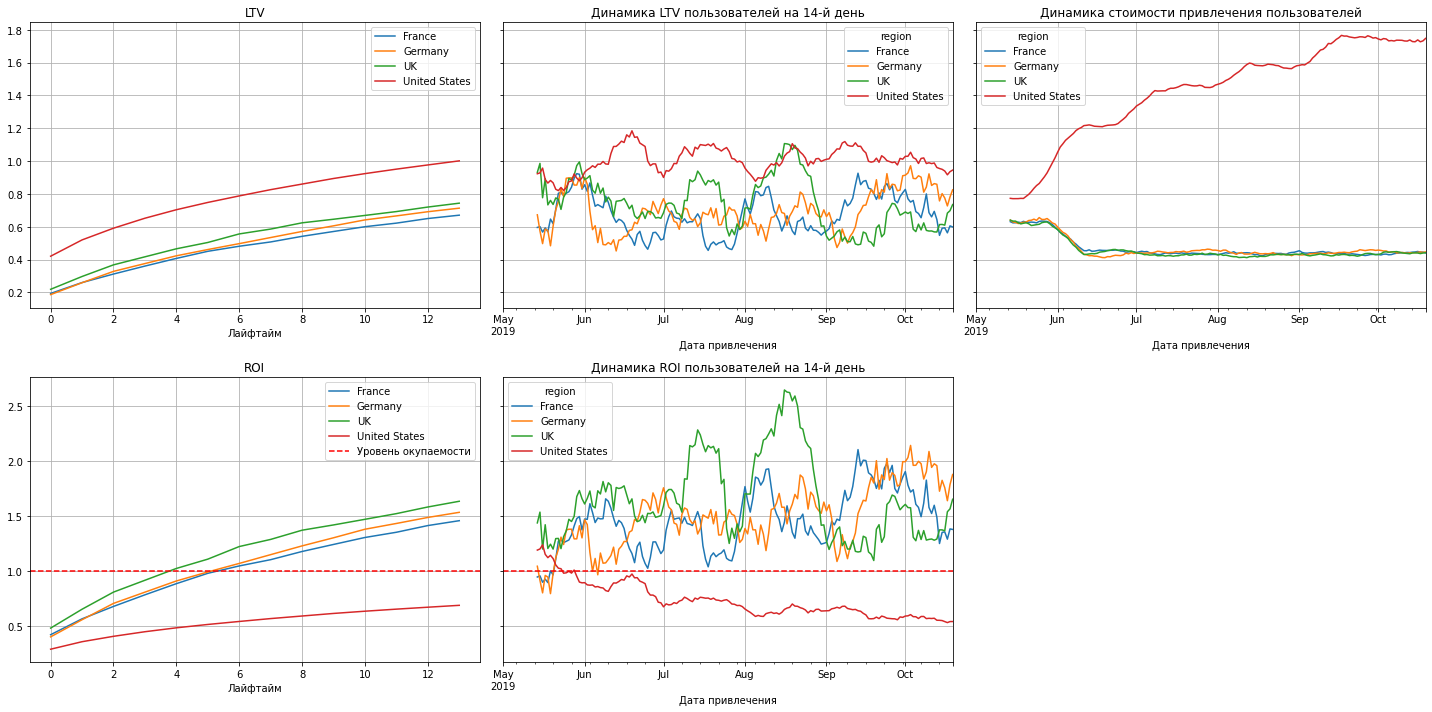

In [59]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

В разбивке по странам вырисовывается следующая ситуация:
 - LTV выше всего у США, реклама не окупается совсем, стоимость привлечения растет, динамика ROI падает. Пользователи США удерживаются хуже всего;
 - остальные страны показывают схожую стоимость привлечения клиентов. LTV Германии, Великобритании и Франции низкий, но стабильный.Лучше всего окупается Великобритания. В целом реклама в европейских странах стала окупаться на 5-6 день.

**Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.**

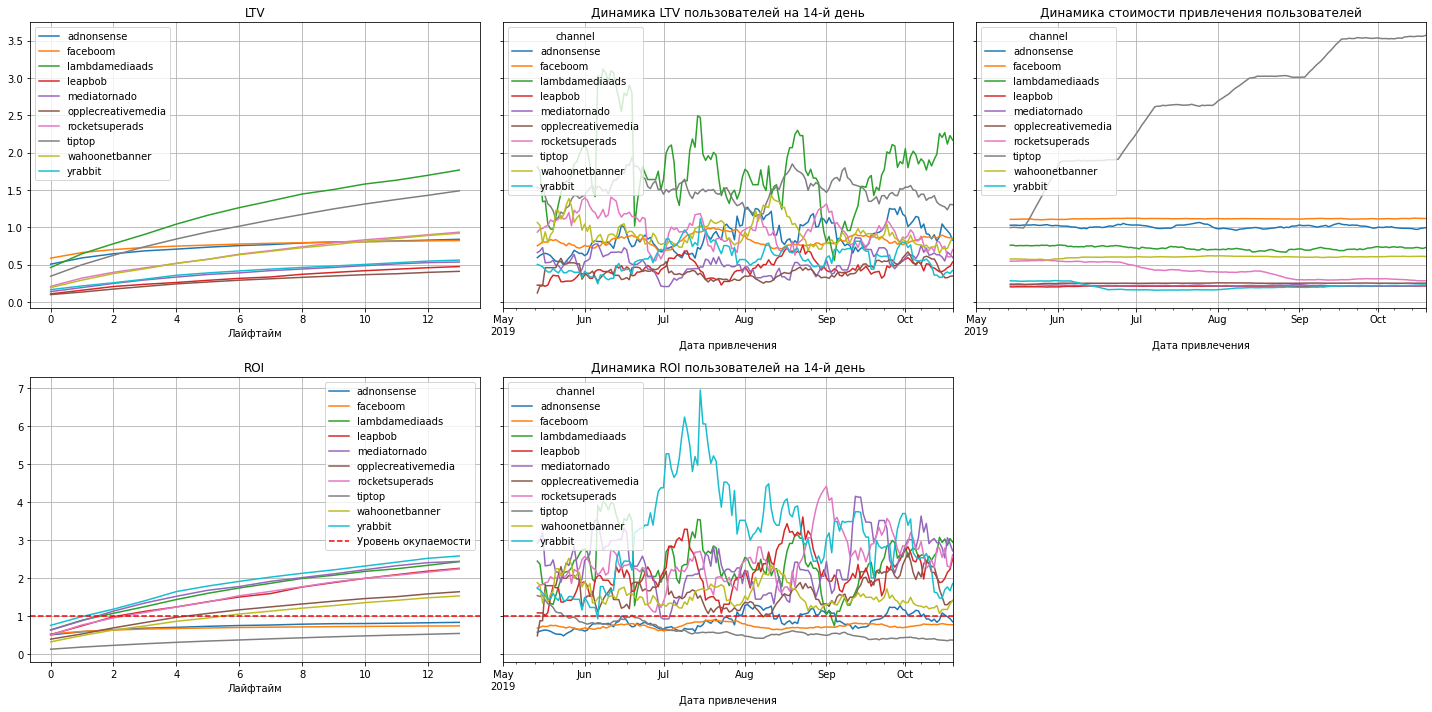

In [60]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

 - показатель LTV наибольший у каналов lambdamediaads и tiptop;
 - стоимость привлечения пользователей наибольшая у канала tiptop, она не прекращала свой рост на протяжении всего периода;
 - по ROI платформа tiptop находится ниже всех и не приближается к уровню окупаемости. Также проблемы наблюдаются с faceboom и adnonsense. Реклама в каналах убыточна.

**Дополнительно проанализируем конверсию пользователей и динамику её изменения по странам**

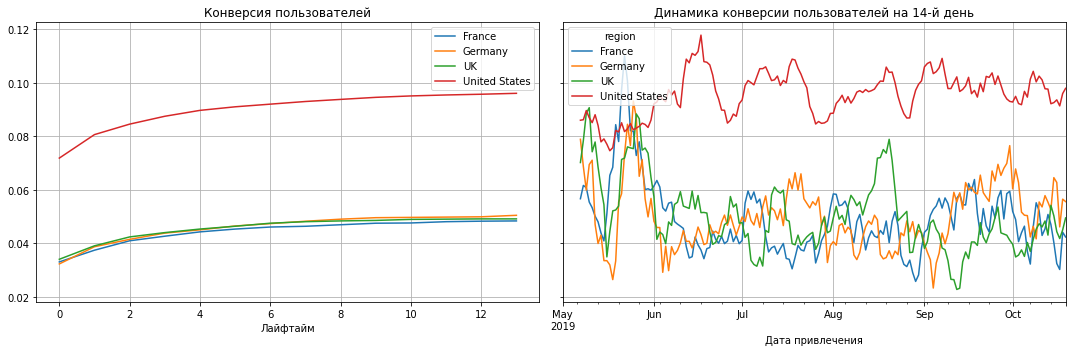

In [61]:
# посмотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графикам видно, что наилучшая конверсия у пользователей из США.

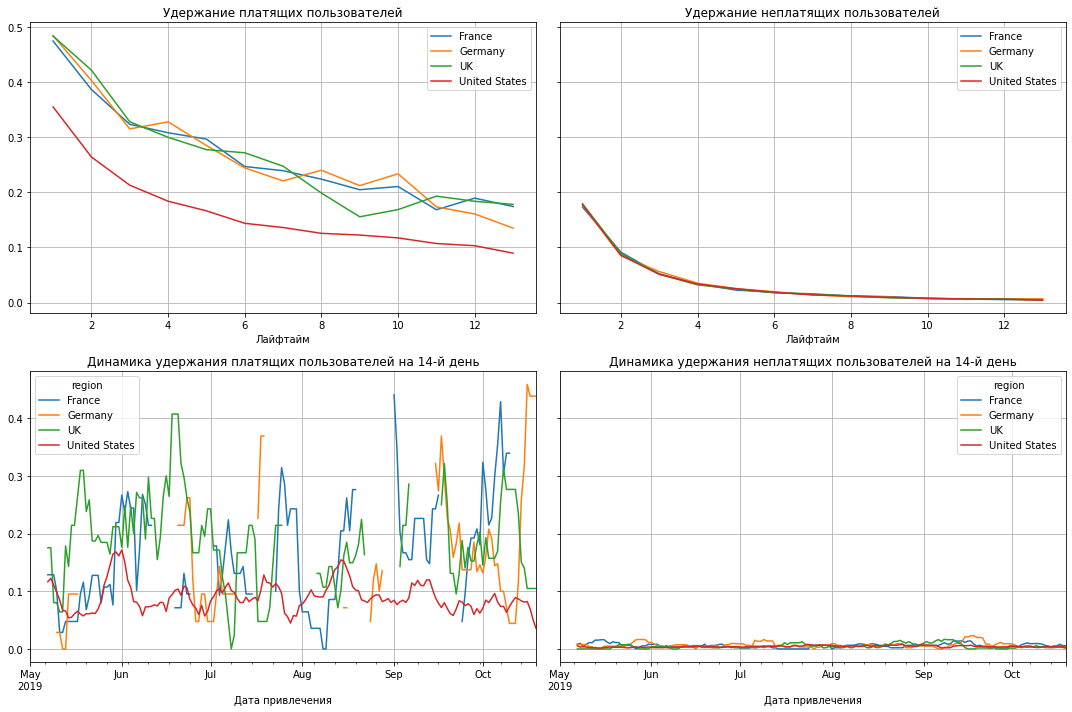

In [62]:
# посмотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США удерживаются хуже чем пользователи из других стран. Удержание неплатящих пользователей для всех платформ движется почти одинаково, а удержание платящих пользователей именно из США значительно ниже. Возможно это связано с устройствами и каналами привлечения именно пользователей из США. 

**Дополнительно проведём анализ конверсии и удержания пользователей с разбивкой по устройствам**

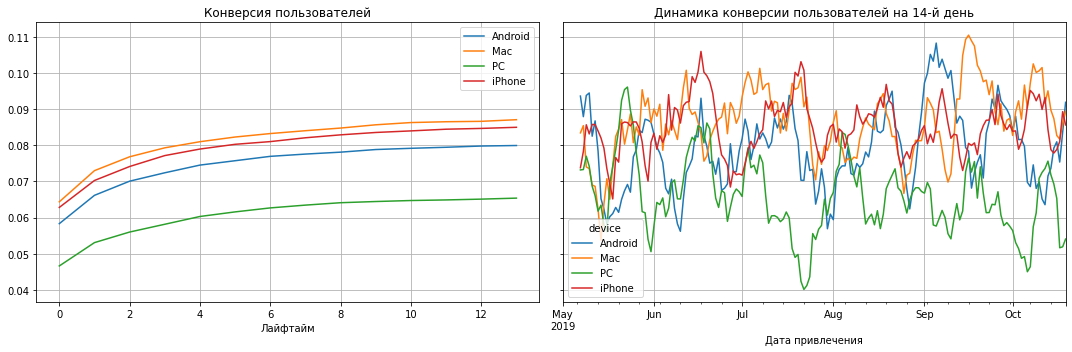

In [63]:
# посмотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В разбивке по устройствам налучшую конверсию показывает Mac. Худшие показатели у пользователей PC.

**Дополнительно проведём анализ конверсии пользователей и динамику её изменения по каналам**

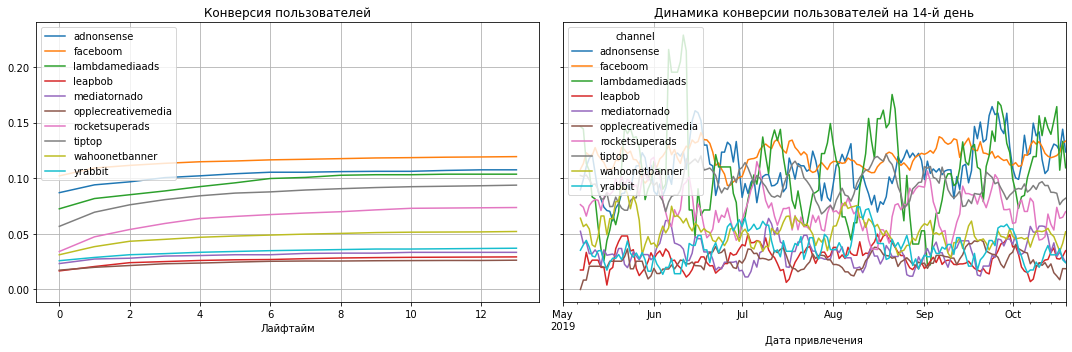

In [64]:
# посмотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

 На графиках видно, что конверсия лучше всего у пользователей платформ faceboom, adnonsense и lambdamediaads. На графиках не наблюдается проблем и аномалий.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Конверсия у дорогих каналов высокая.
</div>

**Дополнительно проведём анализ удержания пользователей по каналам**

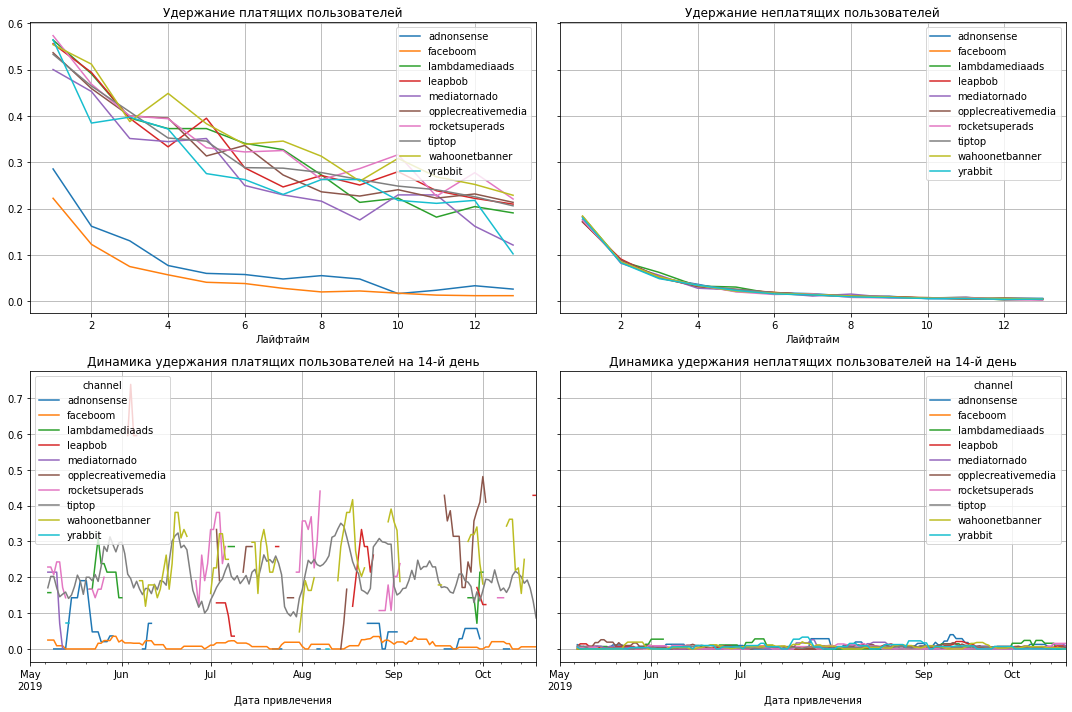

In [65]:
# посмотрим удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи с каналов faceboom и adnonsense имеют наихудшие показатели. При достаточно высокой конверсии пользователи из этих источников плохо удерживаются. Нужно проверить, что не так.

С учётом выявленных выше данных о том что пользователей из США на порядок больше чем из Европы, однако пользователи США практически не удерживаются, логично провести дополнительный анализ по этому регионам. 

**Дополнительно проанализируем окупаемость рекламы для США с разбивкой по рекламным каналам**

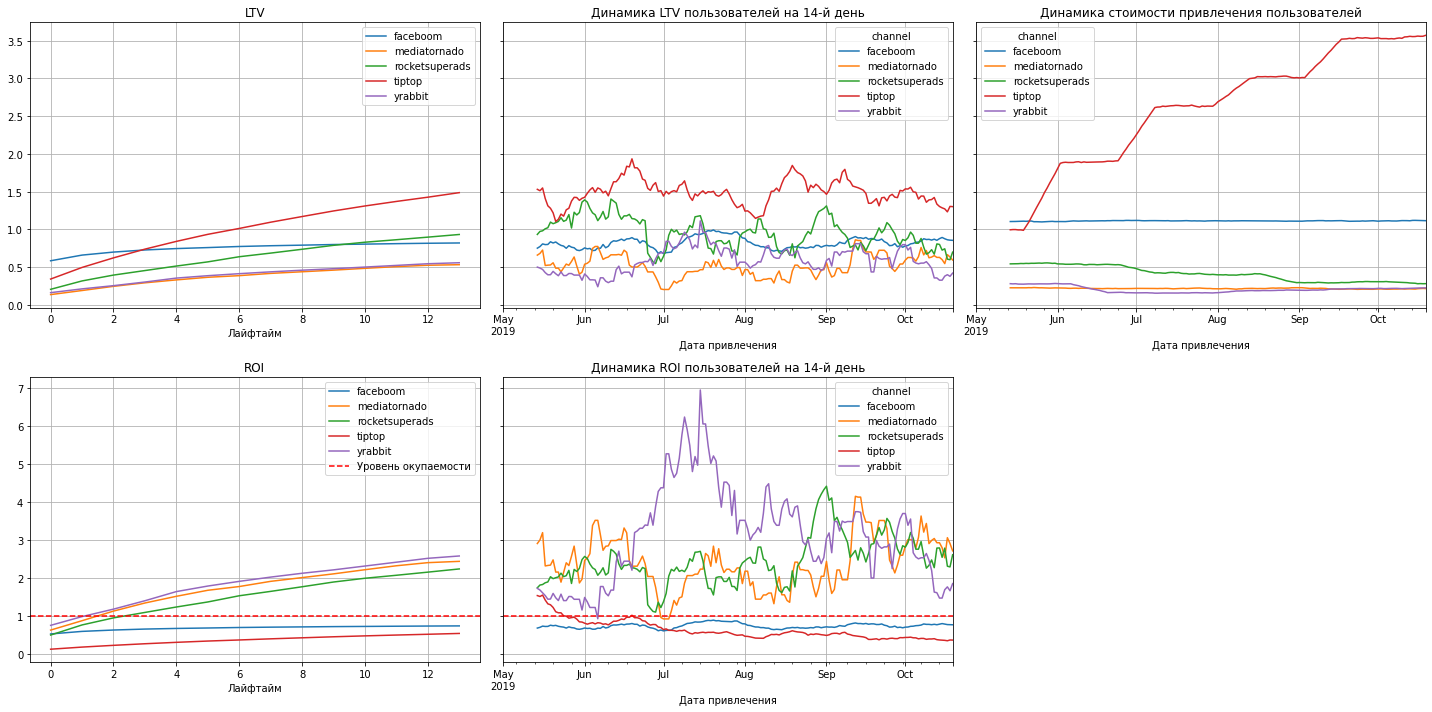

In [66]:
usa = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

- показатель LTV выше у источника tiptop, но он не окупается, аналогично себя показывает источник faceboom. За 14 дней они ни разу не преодолели уровень окупаемости;
- стоимость привлечения клиентов из канала tiptop постоянно растет, в то время как у faceboom стоимость высокая, но стабильная;
- положительная динамика ROI у канала yrabbit и низкая стоимость привлечения пользователей.Также не плохо себя показывают каналы rocketsuperads и mediatornado.

**Дополнительно проанализируем окупаемость рекламы для Европейского региона с разбивкой по рекламным каналам**

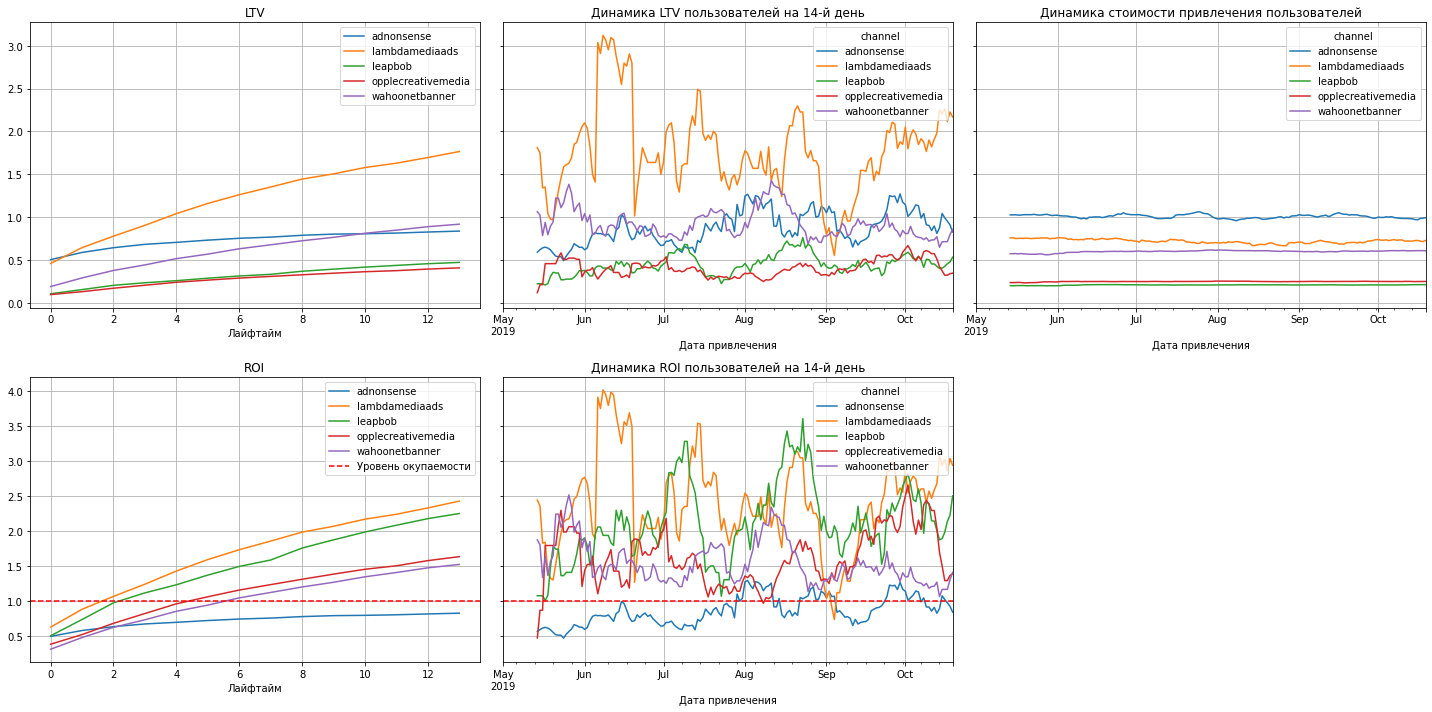

In [67]:
europe = profiles.query('region != "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    europe, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

 - в Европейском регионе показатель LTV выше у источника lambdamediaads;
 - убыточным рекламным каналом является adnonsense, за весь период не пересек уровень окупаемости, остальные каналы трафика начали окупаться на 4-5 день.

**Вывод:**

С помощью графиков LTV, ROI и CAC, был проведён анализ окупаемости рекламы, сделаны следующие выводы:

 - реклама не окупается. О бщий показатель LTV меньше значения CAC, и CAC постоянно растёт. Это свидетельтсвует об убытках, , у прибыльного бизнеса LTV должен быть выше CAC. ROI в конце горизонта анализа не достигает уровня окупаемости. Возможно, проблема в избыточном увеличении рекламного бюджета. К концу анализируемого периода лишь около 10% платящих пользователей продолжают пользоваться приложением Procrastinate Pro+;
 - реклама для пользователей платформ Mac, iPhone и Android не достигает уровня окупаемости в конце горизонта анализа. В разбивке по устройствам налучшую конверсию показывает Mac. Худшие показатели у пользователей PC. Несмотря на более низкую конверсию, пользователи PC удерживаются лучше всего. По этому параметру iPhone и Mac показывают худшие результаты.
 - в разбивке по странам вырисовывается следующая ситуация: LTV выше всего у США, реклама в этом регионе не окупается, стоимость привлечения растет, динамика ROI падает. Пользователи США удерживаются хуже всего. Остальные страны показывают схожую стоимость привлечения клиентов. LTV Германии, Великобритании и Франции низкий, но стабильный. Лучше всего окупается Великобритания. В целом реклама в европейских странах стала окупаться на 5-6 день. Наилучшая конверсия у пользователей из США, однако удерживаются эти пользователи хуже чем клиенты из других стран.
 - наиболее затратна реклама на канале tiptop. Также проблемы наблюдаются с faceboom и adnonsense. Реклама в этих каналах убыточна. Конверсия лучше всего у пользователей платформ faceboom, adnonsense и lambdamediaads. Пользователи с каналов faceboom и adnonsense хуже всего удерживаются.


### Общий вывод

В ходе исследовательского анализа: 
 - составлены профилей пользователей;
 - определены минимальная (2019-05-01) и максимальная (2019-10-31) даты привлечения пользователей;
 - установлено, что приложение рекламируется в четырёх странах США, Германия, Великобритания и Франция;
 - наибольшее количество привлеченных пользователей - 100002 - приходит из США. Доля платящих из США составляет - 6.90%; 
 - Великобритания - 17575 пользоватей и 3.98% платящих пользователей;
 - Франция - 17450 пользователей и 3.80% платящих пользователей;
 - Германия - 14981 пользователей и 4.11% платящих пользователей.
 - установлено, что наибольшее число пользователей заходят в приложение с iPhone - 54479. Среди платящих наибольшая доля пользователей заходит с устройств Mac и iPhone. Следует отметить, что по количеству пользователей Mac представлен меньше всего, но доля платящих среди них наибольшая; 
 - выявлено, что наибольшая доля платящих пользователей приходит из источника faceboom - 12.20%, на втором месте adnonsense	- 11.34%, на третьем месте lambdamediaads - 10.47%. "Органические" пользователи показывают самую низкую конверсию из всех каналов привлечения - 2.06%.

В ходе маркетингового анализа данных установлено что всего на маркетинг затрачено 105 497. Наибольшая сумма затрат на рекламу для источника tiptop - 51.90% рекламного бюджета и составляет 54751.30, следующий по расходам канал faceboom - 30.75% и 32445.60. Наименьшая сумма затрат от источника yrabbit - 0.90% и 944.22. Происходило повышение расходов на рекламу приложения на канале tiptop с мая по сентябрь, в октябре расход снижаются.

При оценке окупаемости рекламы сделаны следующие выводы:

 - реклама не окупается. О бщий показатель LTV меньше значения CAC, и CAC постоянно растёт. Это свидетельтсвует об убытках, , у прибыльного бизнеса LTV должен быть выше CAC. ROI в конце горизонта анализа не достигает уровня окупаемости. Возможно, проблема в избыточном увеличении рекламного бюджета. К концу анализируемого периода лишь около 10% платящих пользователей продолжают пользоваться приложением Procrastinate Pro+;
 - реклама для пользователей платформ Mac, iPhone и Android не достигает уровня окупаемости в конце горизонта анализа. В разбивке по устройствам налучшую конверсию показывает Mac. Худшие показатели у пользователей PC. Несмотря на более низкую конверсию, пользователи PC удерживаются лучше всего. По этому параметру iPhone и Mac показывают худшие результаты.
 - в разбивке по странам вырисовывается следующая ситуация: LTV выше всего у США, реклама в этом регионе не окупается, стоимость привлечения растет, динамика ROI падает. Пользователи США удерживаются хуже всего. Остальные страны показывают схожую стоимость привлечения клиентов. LTV Германии, Великобритании и Франции низкий, но стабильный. Лучше всего окупается Великобритания. В целом реклама в европейских странах стала окупаться на 5-6 день. Наилучшая конверсия у пользователей из США, однако удерживаются эти пользователи хуже чем клиенты из других стран.
 - наиболее затратна реклама на канале tiptop. Также проблемы наблюдаются с faceboom и adnonsense. Реклама в этих каналах убыточна. Конверсия лучше всего у пользователей платформ faceboom, adnonsense и lambdamediaads. Пользователи с каналов faceboom и adnonsense хуже всего удерживаются.
 - самые "дорогие" клиенты приходят из источников tiptop - 2.80, faceboom - 1.11, adnonsense - 1.01.
 - самые "бюджетные" из источников leapbob - 0.21, mediatornado - 0.22, yrabbit - 0.22. 

Причины, с которыми могут быть связаны проблемы окупаемости рекламы:
 - технические проблемы с приложением у пользователей из США;
 - некорректно работает приложение и оплата контента на устройствах iPhone и Mac (самых популярных устройствах в США), поэтому пользователи не удерживаются;
 - акцент был сделан исключительно на привлечение новых клиентов, но не их удержание;
 - неверно определена целевая аудитория;
 - установлена слишком высокая цена на приложение.

**Рекомендации для отдела маркетинга:**

- совместно с разработчиками проследить путь пользователя для выявления возможных технических проблемы у пользователей из США, так как наибольшие количество пользователей прилождения приходит из США;
- проследить корректноть работы приложения и оплаты контента на устройствах iPhone и Mac;
- оптимизировать рекламный бюджет, пропорционально распределив его между различными источниками. Сейчас наибольшие инвестиции получает платформа tiptop, но конверсии, удержание и все показатели у этой платформы не высоки;
- сделать акцент на удержание уже имеющихся пользователей и повышения лояльности клиентов (бесплатный тестовый период, демоверсии, бонусы, скидки, акции, подарки и т.д.).

В качестве перспективных каналов для США следует выделить:
 - yrabbit, так как у него положительная динамика ROI и низкая средняя стоимость привлечения одного пользователя (САС) - 0.22, общая сумма потраченных денежных средств на этот источник - 944.22;
 - mediatornado также имеет положительную динамику ROI, средняя стоимость привлечения одного пользователя (САС) - 0.22, общая сумма потраченных денежных средств на этот источник - 954.48;
 - rocketsuperads имеет имеет положительную динамику ROI, средняя стоимость привлечения одного пользователя (САС) - 0.41, общая сумма потраченных денежных средств на этот источник - 1833.00.
 
Для Европейского региона следует обратить внимание на рекламные каналы:
 - lambdamediaads, у него положительная динамика ROI, средняя стоимость привлечения одного пользователя (САС) - 0.72, общая сумма потраченных денежных средств на источник - 1557.60;
 - wahoonetbanner, у него положительная динамика ROI, средняя стоимость привлечения одного пользователя (САС) - 0.60, общая сумма потраченных денежных средств на источник - 5151.00.